# XGBClassifier

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
df = pd.read_csv(r"Steel_industry_data.csv")
df.head()
df = df.drop(['date','Day_of_week'],axis = 1)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


In [4]:
df = pd.get_dummies(df, columns = ['WeekStatus'])

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.iloc[:,7] = label_encoder.fit_transform(df.iloc[:,7])


In [5]:
df[['Load_Type']] = df[['Load_Type']].apply(pd.to_numeric)

In [6]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,WeekStatus_Weekday,WeekStatus_Weekend
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,True,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,True,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,True,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,True,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,True,False


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Load_Type                             35040 non-null  int64  
 8   WeekStatus_Weekday                    35040 non-null  bool   
 9   WeekStatus_Weekend                    35040 non-null  bool   
dtypes: bool(2), float64(6), int64(2)
memory usage: 2.2 MB


<Axes: >

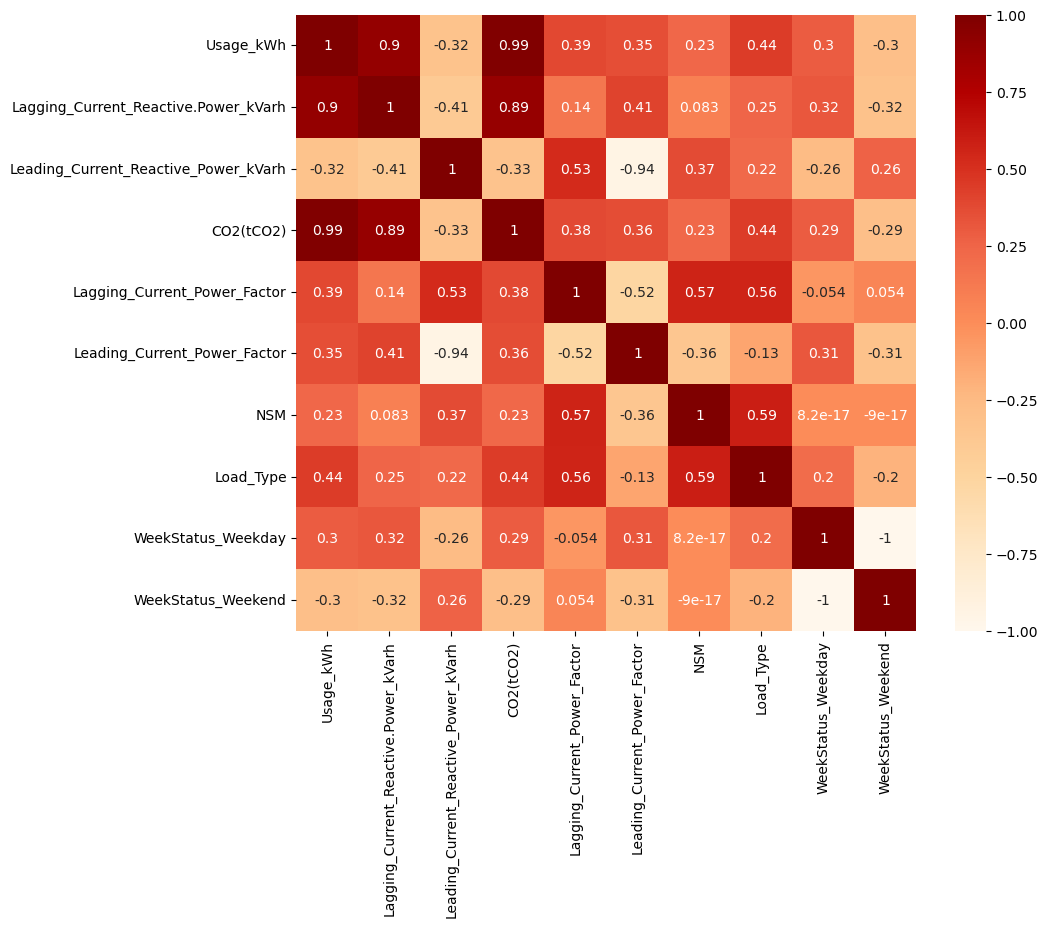

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation =df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns,cmap = 'OrRd', annot = True)

In [63]:
X = df.iloc[:,[0,2,4,6,8,9]]
Y = df.iloc[:,7]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Load_Type                             35040 non-null  int64  
 8   WeekStatus_Weekday                    35040 non-null  bool   
 9   WeekStatus_Weekend                    35040 non-null  bool   
dtypes: bool(2), float64(6), int64(2)
memory usage: 2.2 MB


In [11]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = test_size, 
                                                    random_state = 423)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 423)

In [12]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [14]:
np.unique(y_test)

array([0, 1, 2], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
import numpy as np

# Check the unique values in y_test and y_val
print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_val:', np.unique(y_val))

# Check the number of classes in y_test and y_val
print('Number of classes in y_test:', len(np.unique(y_test)))
print('Number of classes in y_val:', len(np.unique(y_val)))

# Check for NaN or other unexpected values
# print('NaN values in y_test:', np.isnan(y_test).any())
# print('NaN values in y_val:', np.isnan(y_val).any())

# Check for missing values in y_test and y_val
print('Missing values in y_test:', pd.isnull(y_test).any())
print('Missing values in y_val:', pd.isnull(y_val).any())


# Perform accuracy calculation for testing set
accuracy_test = accuracy_score(y_test, predictions)
print('Testing accuracy: ', accuracy_test * 100)

# Perform accuracy calculation for validation set
y_pred_val = model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ', accuracy_val * 100)


Unique values in y_test: [0 1 2]
Unique values in y_val: [0 1 2]
Number of classes in y_test: 3
Number of classes in y_val: 3
Missing values in y_test: False
Missing values in y_val: False
Testing accuracy:  90.6392694063927
Validation accuracy:  90.79908675799086


In [16]:
accuracy = accuracy_score(y_test, predictions)
print('Testing accuracy: ',accuracy*100)

y_pred_val = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ',accuracy*100)


Testing accuracy:  90.6392694063927
Validation accuracy:  90.79908675799086


In [17]:
print('Test Classification_Report: ')
print(classification_report(y_pred,y_test))
print('\n\nTest Validation Classification_Report: ')
print(classification_report(y_val,y_pred_val))


Test Classification_Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2297
           1       0.85      0.83      0.84       937
           2       0.82      0.85      0.83      1146

    accuracy                           0.91      4380
   macro avg       0.88      0.88      0.88      4380
weighted avg       0.91      0.91      0.91      4380



Test Validation Classification_Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2268
           1       0.83      0.85      0.84       903
           2       0.85      0.83      0.84      1209

    accuracy                           0.91      4380
   macro avg       0.88      0.88      0.88      4380
weighted avg       0.91      0.91      0.91      4380



In [18]:
# %%time

# RS = []
# Acc = []
# for i in range(500,1500):
#     rs = i
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = rs)
#     model = XGBClassifier()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(y_test, predictions)
#     accuracy *= 100
#     Acc.append(accuracy)
#     RS.append(rs)
    
# best_accuracy_1 = pd.DataFrame(list(zip(RS,Acc)), columns = ['Random_State', 'Accuracy'])



In [19]:
# best_accuracy_1 = best_accuracy_1.sort_values(by=['Accuracy'])
# display(best_accuracy_1)

# LGBMClassifier

In [21]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.3 MB 2.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.3 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 26280, number of used features: 6
[LightGBM] [Info] Start training from score -0.664121
[LightGBM] [Info] Start training from score -1.572276
[LightGBM] [Info] Start training from score -1.281208


LGBMClassifier()

In [23]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 20 )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 20)

In [24]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [25]:
accuracy = accuracy_score(y_test, predictions)
print('Testing accuracy: ',accuracy*100)

y_pred_val = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ',accuracy*100)

# print('Validation Score'+ str(score))

Testing accuracy:  93.15068493150685
Validation accuracy:  92.67123287671232


In [26]:
print('Test Classification_Report: ')
print(classification_report(y_pred,y_test))
print('\n\nTest Validation Classification_Report: ')
print(classification_report(y_val,y_pred_val))


Test Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2281
           1       0.91      0.85      0.88       979
           2       0.85      0.91      0.88      1120

    accuracy                           0.93      4380
   macro avg       0.91      0.91      0.91      4380
weighted avg       0.93      0.93      0.93      4380



Test Validation Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2295
           1       0.85      0.89      0.87       916
           2       0.89      0.84      0.86      1169

    accuracy                           0.93      4380
   macro avg       0.91      0.90      0.90      4380
weighted avg       0.93      0.93      0.93      4380



# RandomForestClassifier

In [35]:
pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 334.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [37]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 20 )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 20)

In [38]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [39]:
rf = RandomForestClassifier()

In [40]:
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

In [41]:
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E7B5BC5A90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E7AB287F90>})

In [42]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 347}


In [43]:
y_pred = best_rf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',accuracy*100)

y_pred_val = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy: ',accuracy*100)

Testing accuracy:  91.0958904109589
Validation accuracy:  90.11415525114155


In [45]:
print('Test Classification_Report: ')
print(classification_report(y_pred,y_test))
print('\n\nTest Validation Classification_Report: ')
print(classification_report(y_val,y_pred_val))


Test Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2295
           1       0.89      0.83      0.86       992
           2       0.80      0.88      0.84      1093

    accuracy                           0.91      4380
   macro avg       0.89      0.89      0.89      4380
weighted avg       0.91      0.91      0.91      4380



Test Validation Classification_Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2295
           1       0.81      0.85      0.83       916
           2       0.84      0.80      0.82      1169

    accuracy                           0.90      4380
   macro avg       0.87      0.87      0.87      4380
weighted avg       0.90      0.90      0.90      4380



# Testing XGBoost HyperParameter Tuning

In [46]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = test_size, 
                                                    random_state = 423)

In [47]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [48]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [49]:
classifier=xgboost.XGBClassifier()

In [50]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=5,verbose=3)


In [51]:
%%time
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


CPU times: total: 938 ms
Wall time: 7.64 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='recall', verbose=3)

In [52]:
random_search.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
# model = random_search.best_estimator_
random_search.best_params_



{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [54]:
# model = check
model = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None)

In [55]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [57]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy * 100)

87.77397260273972


In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4588
           1       0.80      0.79      0.79      1828
           2       0.78      0.80      0.79      2344

    accuracy                           0.88      8760
   macro avg       0.85      0.85      0.85      8760
weighted avg       0.88      0.88      0.88      8760



# Testing LGBM HyperParameter Tuning


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Create a LGBM classifier object
lgbm = LGBMClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best model
best_lgbm = grid_search.best_estimator_

# Use the best model to predict on the test set
y_pred = best_lgbm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_pred,y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 22425, number of used features: 6
[LightGBM] [Info] Start training from score -0.662280
[LightGBM] [Info] Start training from score -1.575247
[LightGBM] [Info] Start training from score -1.282407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

# PCA


In [64]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


import lightgbm as lgb
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train_pca, y_train)



y_pred = model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_pred,y_test))




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 28032, number of used features: 6
[LightGBM] [Info] Start training from score -0.662306
[LightGBM] [Info] Start training from score -1.575316
[LightGBM] [Info] Start training from score -1.282305
89.02682648401826
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3616
           1       0.85      0.80      0.82      1574
           2       0.78      0.83      0.80      1818

    accuracy                           0.89      7008
   macro avg       0.87      0.86      0.86      7008
weighted avg       0.89      0.89      0.89      7008



In [65]:
model = XGBClassifier()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_pred,y_test))


88.86986301369863
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3603
           1       0.86      0.80      0.82      1582
           2       0.78      0.82      0.80      1823

    accuracy                           0.89      7008
   macro avg       0.87      0.86      0.86      7008
weighted avg       0.89      0.89      0.89      7008

